In [1]:
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [2]:
def load_images_from_folder(folder, start_ratio=0, end_ratio=100):
    """
    This function will load images from a directory. It also takes start and end ratio that can be used to classify images into train and test
    """
    images = {}
    for filename in os.listdir(folder):
        starter = 0
        category = []
        path = folder + "/" + filename
        all_photos_in_directory = os.listdir(path)
        starting_picture_number = int(len(all_photos_in_directory)*start_ratio/100)
        ending_picture_number = int(len(all_photos_in_directory)*end_ratio/100)
        for cat in all_photos_in_directory:
            starter += 1
            if not(starting_picture_number <= starter <= ending_picture_number):
                continue
            img = cv2.imread(path + "/" + cat, 0)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            if img is not None:
                category.append(img)
        images[filename] = category
    return images

In [3]:
images = load_images_from_folder('flower_photos', end_ratio=80)  # take all images category by category 
test = load_images_from_folder('flower_photos', start_ratio=80) # take test images 

In [4]:
def orb_features(images):
    """
    This function will take images as input and calculate the ORB features for them.
    """
    class_names = list(images.keys())
    class_vector = dict()
    for i in range(len(class_names)):
        class_vector[class_names[i]] = i
   
    tags = []
    descriptor_list = []
    star = cv2.ORB_create(20)

    for key,value in images.items():
        features = []
        for img in value:
            kp = star.detect(img, None)
            kp, des = star.compute(img, kp)
           
            descriptor_list.extend(des)
            all_tags = [class_vector[key] for _ in range(len(des))]
            tags.extend(all_tags)
        #     features.append(des)
        # sift_vectors[key] = features
    return [descriptor_list, tags]

In [6]:
orbs = orb_features(images) 

In [ ]:
svc = SVC()
svc.fit(orbs[0], orbs[1])

In [ ]:
# %pip install joblib
import joblib
filename = 'svc_flowers.sav'
joblib.dump(svc, filename)

In [7]:
# We have already trained a model that we will load here for svc
svc = joblib.load("svc_flowers.sav")

In [8]:
def make_prediction(image_orb, classifier):
    """
    This function will take an image as input and return the prediction made by classifier on that image.
    """
    # sift = cv2.SIFT_create()
    # kp, des = sift.detectAndCompute(image,None)
    prediction = svc.predict(image_orb)
    prediction = np.bincount(prediction).argmax()
    return prediction

In [10]:
classes = list(test.keys())
star = cv2.ORB_create()
img = test["roses"][22]
kp = star.detect(img, None)
kp, des = star.compute(img, kp)
classes[make_prediction(des, svc)]

'tulips'

In [ ]:
# training a random forest classifier on the same data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(orbs[0], orbs[1])

In [ ]:
# %pip install joblib
filename = 'rfc_flowers.sav'
joblib.dump(svc, filename)

In [11]:
# We have already trained an rfc classifier. We will use that.
rfc = joblib.load("rfc_flowers.sav")

In [12]:
def get_accuracy(classifier, images):
    tags = dict()
    all_classes = list(images.keys())
    for c in range(len(all_classes)):
        tags[all_classes[c]] = c 
    
    original_tags = []
    predicted_tags = []

    star = cv2.ORB_create()
    for key, value in images.items():
        features = []
        for img in value:
            kp = star.detect(img, None)
            kp, des = star.compute(img, kp)     
            p = make_prediction(des, classifier)
            predicted_tags.append(p)
            original_tags.append(tags[key])
    return original_tags, predicted_tags

In [15]:
for k, v in test.items():
    test[k] = v[:10]
ot, pt = get_accuracy(rfc, test)

In [16]:
from sklearn.metrics import accuracy_score, r2_score
print("The Accuracy of Random Forest Classifier:")
print("Accuracy:", accuracy_score(ot, pt))
print("R2-Score:", r2_score(ot, pt))

The Accuracy of Random Forest Classifier:
Accuracy: 0.36
R2-Score: 0.16000000000000003


In [17]:
fot, pt = get_accuracy(svc, test)

In [18]:
from sklearn.metrics import accuracy_score, r2_score
print("The Accuracy of Support Vector Classifier:")
print("Accuracy:", accuracy_score(ot, pt))
print("R2-Score:", r2_score(ot, pt))

The Accuracy of Support Vector Classifier:
Accuracy: 0.36
R2-Score: 0.16000000000000003


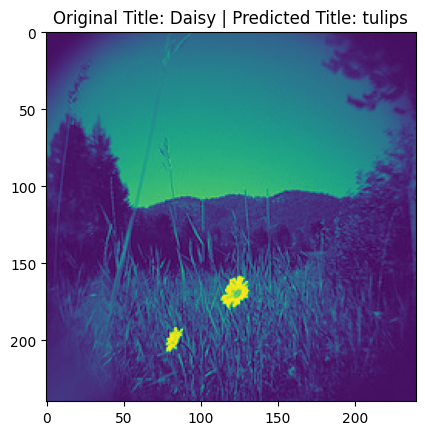

In [21]:
# Inference of single image using RFC
import matplotlib.pyplot as plt
%matplotlib inline
star = cv2.ORB_create()
an_image = test["daisy"][0]
plt.imshow(an_image);
kp = star.detect(img, None)
kp, des = star.compute(img, kp)
pred = list(test.keys())[make_prediction(des, rfc)]
plt.title(f'Original Title: Daisy | Predicted Title: {pred}');

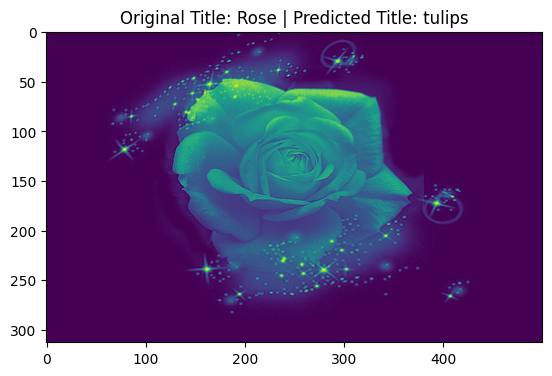

In [23]:
# Inference of single image using RFC
import matplotlib.pyplot as plt
%matplotlib inline
star = cv2.ORB_create()
an_image = test["roses"][5]
plt.imshow(an_image);
kp = star.detect(img, None)
kp, des = star.compute(img, kp)
pred = list(test.keys())[make_prediction(des, rfc)]
plt.title(f'Original Title: Rose | Predicted Title: {pred}');

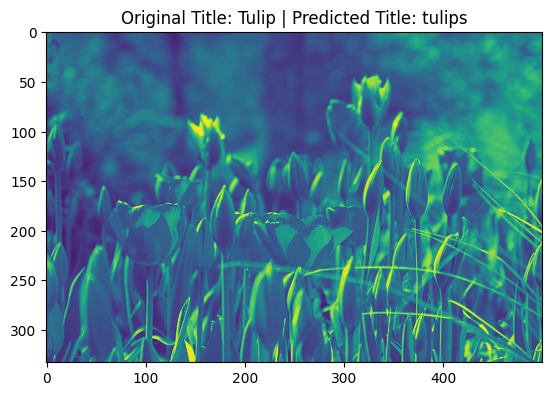

In [25]:
# Inference of single image using RFC
import matplotlib.pyplot as plt
%matplotlib inline
star = cv2.ORB_create()
an_image = test["tulips"][8]
plt.imshow(an_image);
kp = star.detect(img, None)
kp, des = star.compute(img, kp)
pred = list(test.keys())[make_prediction(des, rfc)]
plt.title(f'Original Title: Tulip | Predicted Title: {pred}');

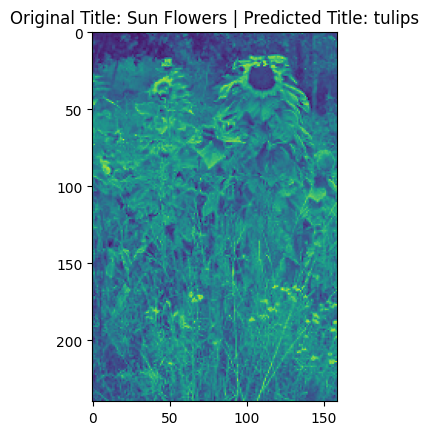

In [27]:
# Inference of single image using RFC
import matplotlib.pyplot as plt
%matplotlib inline
star = cv2.ORB_create()
an_image = test["sunflowers"][8]
plt.imshow(an_image);
kp = star.detect(img, None)
kp, des = star.compute(img, kp)
pred = list(test.keys())[make_prediction(des, rfc)]
plt.title(f'Original Title: Sun Flowers | Predicted Title: {pred}');